<div style="text-align: center;">
    <h5>Unveiling the Trajectory: Analyzing JPMorgan Chase & Co. Stock Performance and Trends</h5>
</div>

In this analysis, we will conduct a straightforward examination using the yfinance library. This library enables us to retrieve historical stock data for JPMorgan Chase & Co. With this data at our disposal, we can explore trends, patterns, and basic performance indicators that shed light on the trajectory of JPMorgan's stock over a specified time period. By utilizing the power of yfinance, we aim to gain valuable insights into the stock's past performance and trends, paving the way for a more informed perspective on its journey.

In the upcoming analysis, we'll be conducting a basic assessment using various libraries, including yfinance. This will enable us to examine historical stock data for JPMorgan Chase & Co. Our goal is to uncover fundamental trends and performance indicators that provide insights into the stock's historical patterns. By harnessing the capabilities of these libraries, we aim to gain valuable insights into the stock's past performance and overall trends.

## Library Import

##### The analysis begins by importing various essential libraries, including yfinance for data retrieval, pandas for data manipulation, sqlalchemy for database interaction, matplotlib and seaborn for plotting, numpy for numerical operations, and mplfinance for creating candlestick charts.

In [35]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import sqlalchemy as sa
from sqlalchemy import create_engine as ce
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mplfinance as mpf
import warnings

# Set plotting style for consistency
plt.style.use('ggplot')
warnings.filterwarnings("ignore")

## Styling and Data Retrieval

##### The plt.style.use('ggplot') command sets the plotting style. Historical stock data for JPMorgan Chase & Co. is retrieved using the yfinance.download function, and the data is then saved as a CSV file.

In [2]:
# Step 1: Data Retrieval
# Download historical stock data for JPMorgan Chase & Co.
data = yf.download('JPM', start = '2013-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
# Save data as a CSV file
data.to_csv("jpm_data.csv")

## Database Connection
#####  Database credentials are stored, and a connection to a PostgreSQL database is established using SQLAlchemy's create_engine. The CSV data is read into a DataFrame and then written to the database table using the to_sql method.

In [11]:
# Database connection details
db_username = "********"
db_password = "********"
db_host = "********"
db_port = "****"  
db_name = "JPM"

# Construct the database URL
db_url = f"postgresql://{db_username}:{db_password}@{db_host}:{db_port}/{db_name}"

In [12]:
# Create a database engine
engine = ce(db_url)

In [13]:
# Path to the CSV file
csv_path = "jpm_data.csv"
# Read CSV data into a DataFrame
df = pd.read_csv(csv_path)
# Define the table name
table_name = "jpm_data"
# Write DataFrame to the database table
df.to_sql(table_name, con=engine, if_exists='replace', index=False)

677

In [14]:
# Step 2: Data Retrieval from Database
# Reconnect to the database
table_name = "jpm_data"
# Construct a SQL query to retrieve the data
query = sa.sql.text(f"SELECT * FROM {table_name}")

In [15]:
# Connect to the database and execute the query
connection = engine.connect()
result = connection.execute(query)
# Create a DataFrame from the query result
df = pd.DataFrame(result.fetchall(), columns=result.keys())
# Close the database connection
connection.close()

In [16]:
# Display the first 5 rows of the DataFrame
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,44.980000,45.000000,44.220001,44.660000,33.328999,31413000
1,2013-01-03,44.740002,44.750000,44.200001,44.570000,33.261822,24227700
2,2013-01-04,44.450001,45.430000,44.439999,45.360001,33.851391,24487700
3,2013-01-07,45.090000,45.490002,45.020000,45.410000,33.888702,24456900
4,2013-01-08,45.400002,45.500000,44.959999,45.500000,33.955875,19624200


In [17]:
# Display summary statistics of the 'Close' prices
df['Close'].describe()

count    2677.000000
mean       97.348046
std        34.538820
min        44.570000
25%        62.040001
50%        98.930000
75%       121.239998
max       171.779999
Name: Close, dtype: float64

## Data Visualization - Basic Line Plot
##### The DataFrame is prepared for analysis by converting the 'Date' column to a datetime format and setting it as the index. A basic line plot of the 'Close' prices is created using Matplotlib's plot function.

In [18]:
# Step 3: Data Preparation
# Convert the 'Date' column to datetime format and set it as the index
df['Date'] = pd.to_datetime(df['Date']) 
df.set_index('Date', inplace=True) 

[]

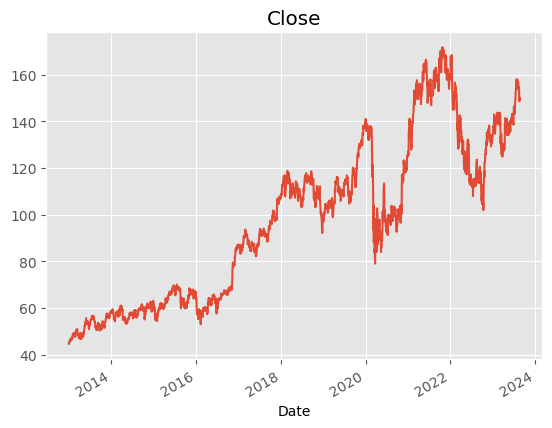

In [19]:
# Step 4: Basic Line Plot
# Plot the 'Close' prices over time
df['Close'].plot(kind='line',
                 x = 'Date',
                 title = 'Close')

plt.plot()

## Data Visualization - Moving Averages
##### The 50-day Simple Moving Average (SMA) and Exponential Moving Average (EMA) are calculated and plotted alongside the 'Close' prices to highlight trends.

[]

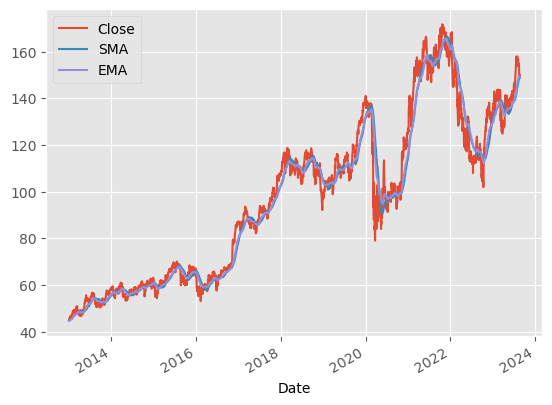

In [20]:
# Step 5: Moving Averages
# Calculate 50-day Simple Moving Average (SMA) and Exponential Moving Average (EMA)
df['SMA'] = df['Close'].rolling(window=50).mean()
df['EMA'] = df['Close'].ewm(span = 50, adjust=False).mean()
# Plot 'Close', 'SMA', and 'EMA' on the same plot
df[['Close','SMA','EMA']].plot(kind='line')

plt.plot()

## Data Visualization - Daily Price Range Histogram
##### A histogram representing the distribution of the daily price range is generated using Seaborn. This provides insight into the volatility of the stock.

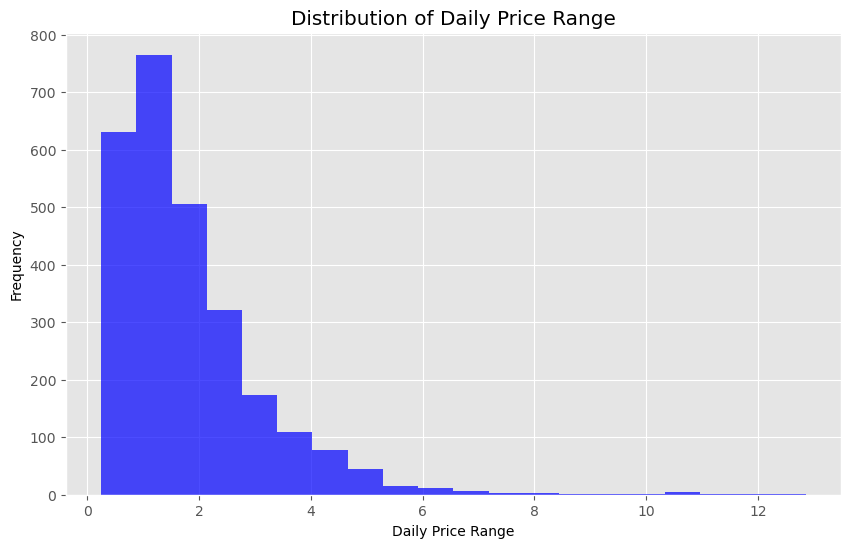

In [22]:
# Step 6: Daily Price Range Histogram
# Calculate and plot the distribution of daily price ranges
df['Daily_Price_Range'] = df['High'] - df['Low']
df['Daily_Price_Range'].plot(kind ='hist',
                             figsize = (10, 6),
                             bins = 20,
                             color = 'blue',
                             alpha = 0.7,
                             grid = True)
plt.title('Distribution of Daily Price Range')
plt.xlabel('Daily Price Range')
plt.ylabel('Frequency')
plt.show()

## Calculation of Average True Range (ATR)
##### The Average True Range (ATR) indicator, a measure of volatility, is calculated using a custom function. The ATR values are then plotted over time.

In [23]:
# Step 7: Average True Range (ATR)
# Define a function to calculate Average True Range (ATR)
def calculate_atr(data, period=14):
    tr = pd.DataFrame(index=data.index)
    tr['HL'] = data['High'] - data['Low']
    tr['HC'] = abs(data['High'] - data['Close'].shift())
    tr['LC'] = abs(data['Low'] - data['Close'].shift())
    tr['TR'] = tr[['HL', 'HC', 'LC']].max(axis=1)
    atr = tr['TR'].rolling(window=period).mean()
    return atr

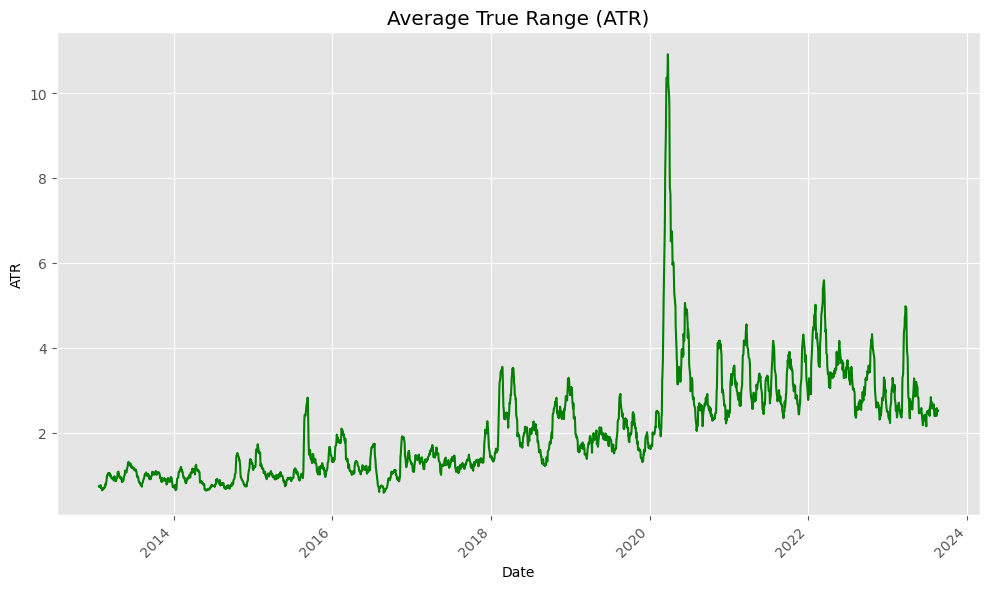

In [24]:
# Calculate and plot the ATR over time
df['ATR'] = calculate_atr(df)
df['ATR'].plot(kind = 'line',
               x = 'Date',
               color = 'green',
               grid = True,
               figsize = (10, 6))
                         
plt.title('Average True Range (ATR)')
plt.xlabel('Date')
plt.ylabel('ATR')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Data Visualization - Trading Volume Trends:
##### The average and standard deviation of daily trading volume are calculated. A bar plot is created to display the trading volume over time, offering insights into market activity.

In [25]:
# Step 8: Trading Volume Trends
# Calculate the average and standard deviation of daily trading volume
average_daily_volume = df['Volume'].mean()
std_daily_volume = df['Volume'].std()

In [26]:
average_daily_volume

15424243.151662309

In [27]:
std_daily_volume

6853073.086117154

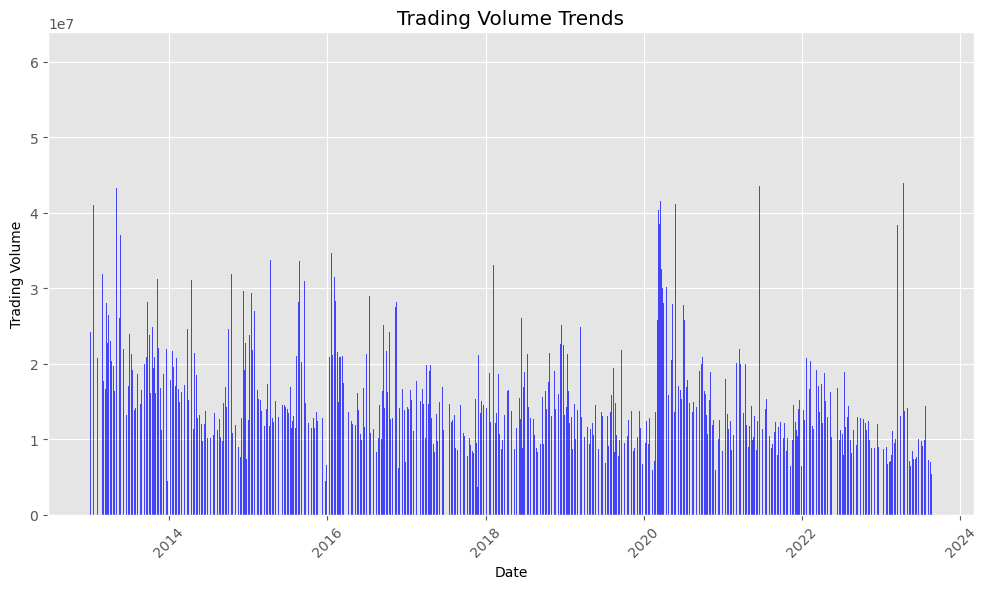

In [28]:
# Plot the trading volume over time
plt.figure(figsize=(10, 6))
plt.bar(df.index,df['Volume'],color = 'blue', alpha = 0.7)
plt.title('Trading Volume Trends')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

## Candlestick Chart Patterns - Doji, Hammer, Shooting Star:
##### Three candlestick chart patterns (Doji, Hammer, and Shooting Star) are identified using specific conditions based on Open, Close, High, and Low prices. These patterns help visualize potential trend reversals.

In [29]:
# Step 9: Candlestick Chart Patterns
# Define conditions for Doji, Hammer, and Shooting Star patterns
# Identify and label Doji, Hammer, and Shooting Star pattern

doji_condition = (
    abs(df['Open'] - df['Close']) / (df['High'] - df['Low'])) < 0.1
df['Doji'] = np.where(doji_condition, 1, 0)

hammer_condition = (
    ((df['High'] - df['Low']) > 3 * (df['Open'] - df['Close'])) &
    ((df['Close'] - df['Low']) / (0.001 + df['High'] - df['Low']) > 0.6) &
    ((df['Open'] - df['Low']) / (0.001 + df['High'] - df['Low']) > 0.6)
)
df['Hammer'] = np.where(hammer_condition, 1, 0)

shooting_star_condition = (
    ((df['High'] - df['Low']) > 3 * (df['Open'] - df['Close'])) &
    ((df['High'] - df['Close']) / (0.001 + df['High'] - df['Low']) > 0.6) &
    ((df['High'] - df['Open']) / (0.001 + df['High'] - df['Low']) > 0.6)
)
df['Shooting_Star'] = np.where(shooting_star_condition, 1, 0)

## Candlestick Chart with Patterns - Overall View
##### A candlestick chart is generated using mplfinance, showcasing the Open, High, Low, and Close prices. The chart is styled to distinguish between upward and downward movements.

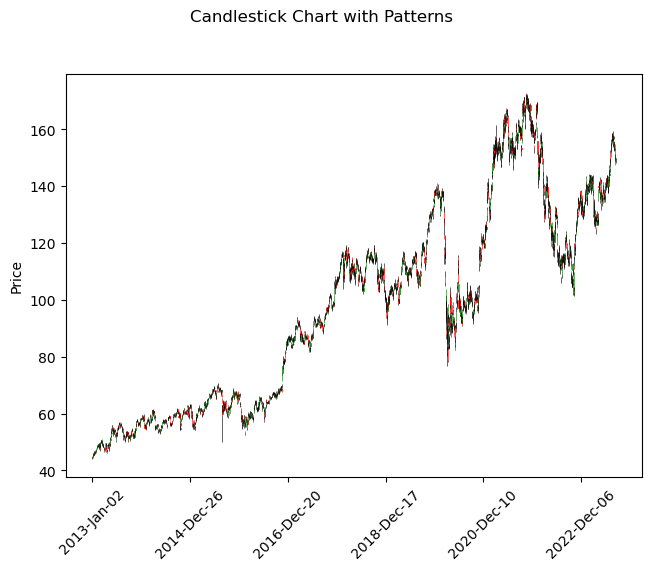

In [33]:
# Step 10: Candlestick Chart with Patterns - Overall View
# Plot a candlestick chart with identified patterns
ohlc = df[['Open', 'High', 'Low', 'Close']]
mc = mpf.make_marketcolors(up='g', down='r', edge='inherit', volume='gray')
s = mpf.make_mpf_style(marketcolors=mc)

mpf.plot(ohlc, 
         type='candle', 
         style=s, 
         title='Candlestick Chart with Patterns', 
         ylabel='Price', 
         ylabel_lower='Volume')

## Candlestick Chart with Patterns - Last Day View
##### Similar to the previous chart, a candlestick chart is created specifically for the last day of the available data, providing a detailed view of price movements.

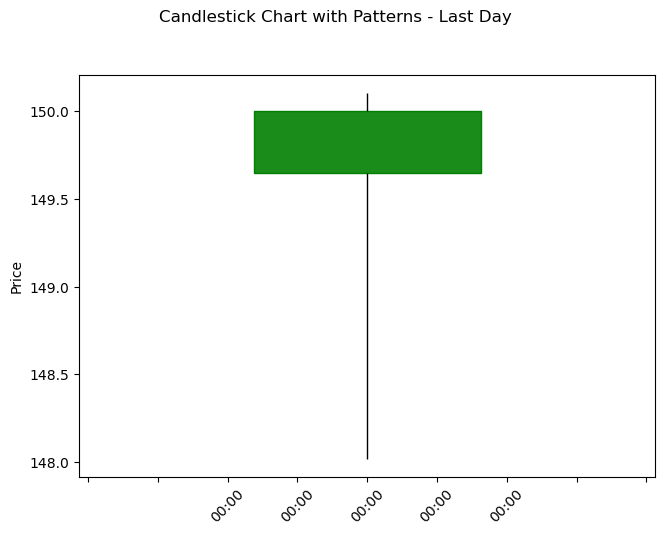

In [31]:
# Step 11: Candlestick Chart with Patterns - Last Day View
# Plot a candlestick chart with identified patterns for the last day of data
last_day_data = df[df.index.date == df.index.date[-1]]

ohlc_last_day = last_day_data[['Open', 'High', 'Low', 'Close']]
mc = mpf.make_marketcolors(up='g', down='r', edge='inherit', volume='gray')
s = mpf.make_mpf_style(marketcolors=mc)

mpf.plot(ohlc_last_day, 
         type='candle', 
         style=s, 
         title='Candlestick Chart with Patterns - Last Day', 
         ylabel='Price', 
         ylabel_lower='Volume')

This comprehensive analysis covers various aspects of JPMorgan Chase & Co.'s stock performance, from basic visualizations like line plots and histograms to more advanced techniques like calculating technical indicators and identifying candlestick chart patterns. The use of multiple libraries and techniques helps provide a comprehensive picture of the stock's trajectory over time.

## Summary and Conclusion

In this beginner-level portfolio project, we embarked on a journey to analyze the stock performance of JPMorgan Chase & Co. Using Python and various libraries, we conducted a thorough examination of historical stock data, applying fundamental analysis and technical indicators. Let's recap the key insights we've gained from our analysis:

- **Historical Trends and Patterns:** We visualized the trajectory of JPMorgan's stock by plotting its closing prices over time. This provided a clear picture of how the stock has performed over the years.

- **Moving Averages and Volatility:** By calculating and visualizing both Simple Moving Averages (SMA) and Exponential Moving Averages (EMA), we identified trends and potential reversal points in the stock's price movements. Additionally, we explored the distribution of daily price ranges to understand the stock's volatility.

- **Volatility and Trading Volume:** Analyzing the Average True Range (ATR) allowed us to assess the stock's volatility, shedding light on periods of high and low volatility. The analysis of trading volume trends offered insights into market participation and activity.

- **Candlestick Patterns:** We delved into candlestick chart patterns, identifying key patterns like Doji, Hammer, and Shooting Star. These patterns hinted at potential trend reversals and provided visual cues for understanding price movements.

Our analysis not only showcased the power of Python libraries such as `yfinance`, `pandas`, and `mplfinance`, but also introduced foundational concepts in stock analysis. As beginners, we've gained practical experience in data retrieval, visualization, and technical analysis, which are essential skills for anyone exploring the world of financial data.

It's important to note that while this analysis has provided valuable insights, stock analysis is a complex field influenced by various factors including market sentiment, economic indicators, and geopolitical events. This project serves as a stepping stone, inviting us to further explore and deepen our understanding of financial markets and data analysis.

As we conclude this project, we encourage you to continue building on these skills, refining your analysis techniques, and exploring new avenues of financial analysis. With each project, we take a step closer to unraveling the mysteries of the financial world.

Happy analyzing!

*Disclaimer: This analysis is for educational purposes only and should not be considered financial advice. Past performance is not indicative of future results.*
